<a href="https://colab.research.google.com/github/Chandusiddartha/FML/blob/main/Univariate_analysis_on_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [9]:
X=data.drop('medv',axis=1).values
Y=data['medv'].values
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [11]:
X_rooms=X[:,5]

In [17]:
X_rooms=X_rooms.reshape(-1,1)
Y=Y.reshape(-1,1)
Y.shape

(506, 1)

In [18]:
X_rooms.shape
Y.shape

(506, 1)

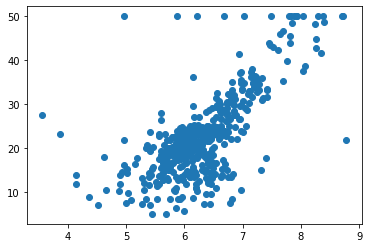

In [20]:
plt.scatter(X_rooms, Y)
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rooms,Y, test_size=0.20,random_state=101)

array([[6.315],
       [6.065],
       [6.229],
       [6.02 ],
       [6.426],
       [7.249],
       [8.266],
       [6.816],
       [6.023],
       [8.247],
       [6.211],
       [5.841],
       [7.241],
       [6.405],
       [6.345],
       [6.604],
       [6.319],
       [6.162],
       [6.749],
       [5.705],
       [5.876],
       [6.758],
       [6.383],
       [6.242],
       [6.202],
       [4.88 ],
       [5.272],
       [5.998],
       [6.122],
       [7.185],
       [6.115],
       [5.926],
       [6.98 ],
       [6.101],
       [6.631],
       [6.897],
       [7.686],
       [6.041],
       [6.629],
       [7.61 ],
       [6.98 ],
       [5.822],
       [6.438],
       [5.834],
       [5.949],
       [6.375],
       [5.92 ],
       [6.482],
       [5.99 ],
       [6.051],
       [8.034],
       [7.016],
       [6.312],
       [6.015],
       [6.095],
       [5.617],
       [7.393],
       [6.415],
       [6.229],
       [6.211],
       [8.704],
       [6.939],
       [

In [28]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [29]:
y_predict = reg.predict(X_train)

In [30]:

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MAE = mean_absolute_error(y_train,y_predict)
MSE = mean_squared_error(y_train,y_predict)
RMSE = np.sqrt(mean_squared_error(y_train,y_predict))
R2_SCORE = r2_score(y_train,y_predict)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 4.2274300161917875
MSE : 39.486393420528955
RMSE : 6.283819970410431
R2_SCORE : 0.4886339821566138


In [31]:
y_predict_test = reg.predict(X_test)
MAE = mean_absolute_error(y_test,y_predict_test)
MSE = mean_squared_error(y_test,y_predict_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_test))
R2_SCORE = r2_score(y_test,y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 5.335298713755075
MSE : 59.95013625764062
RMSE : 7.742747332674664
R2_SCORE : 0.46564313381982303


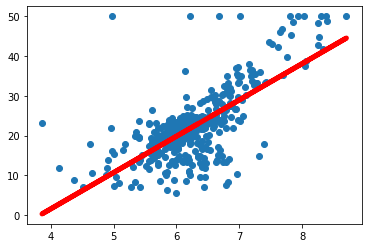

In [33]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_predict,color='red',linewidth=5)